In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("dynamic_pricing.csv")
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [6]:
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

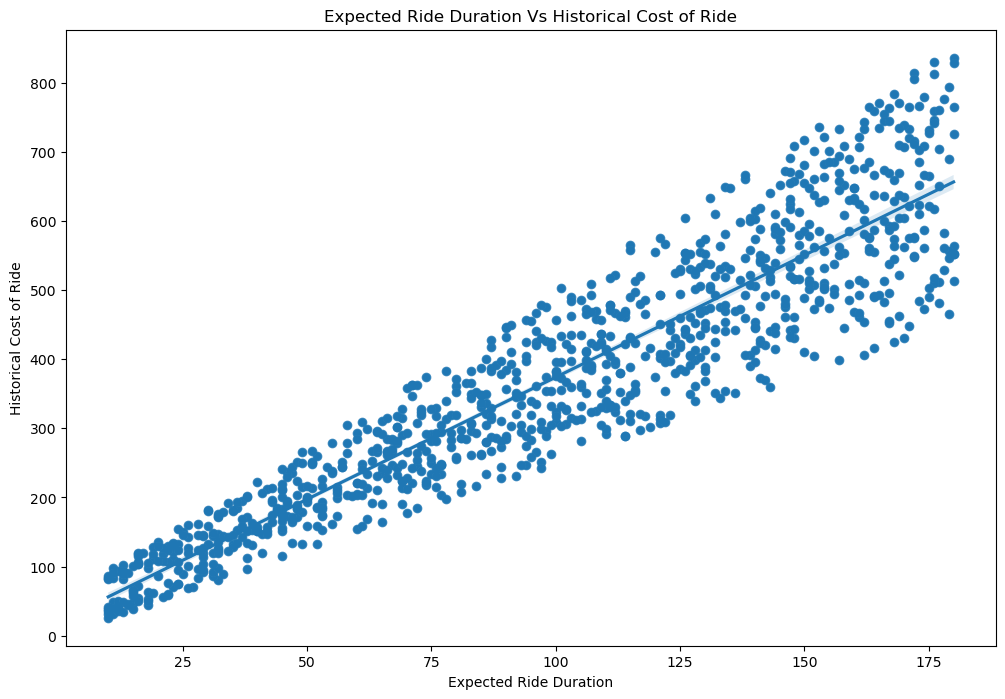

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df, 
                x = 'Expected_Ride_Duration', 
                y = 'Historical_Cost_of_Ride'
                )
sns.regplot(data = df, 
            x = 'Expected_Ride_Duration',
            y = 'Historical_Cost_of_Ride'
            )
plt.title('Expected Ride Duration Vs Historical Cost of Ride')
plt.xlabel('Expected Ride Duration')
plt.ylabel('Historical Cost of Ride')
plt.show()

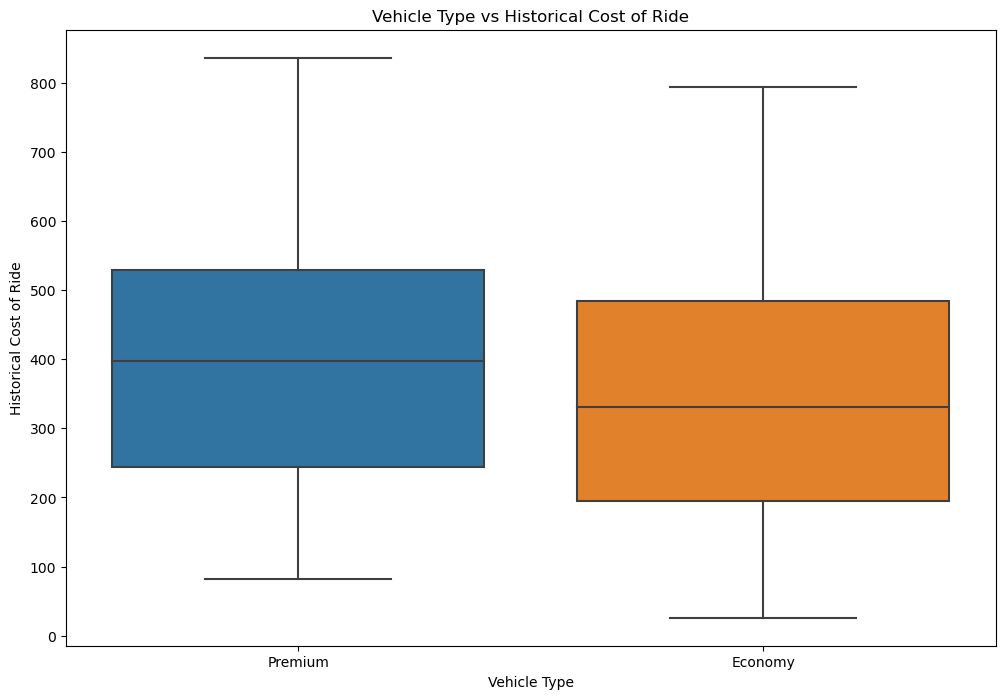

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df, 
            x = 'Vehicle_Type',
            y = 'Historical_Cost_of_Ride'
            )
plt.title('Vehicle Type vs Historical Cost of Ride')
plt.xlabel('Vehicle Type')
plt.ylabel('Historical Cost of Ride')
plt.show()

In [10]:
import warnings
warnings.filterwarnings('ignore')

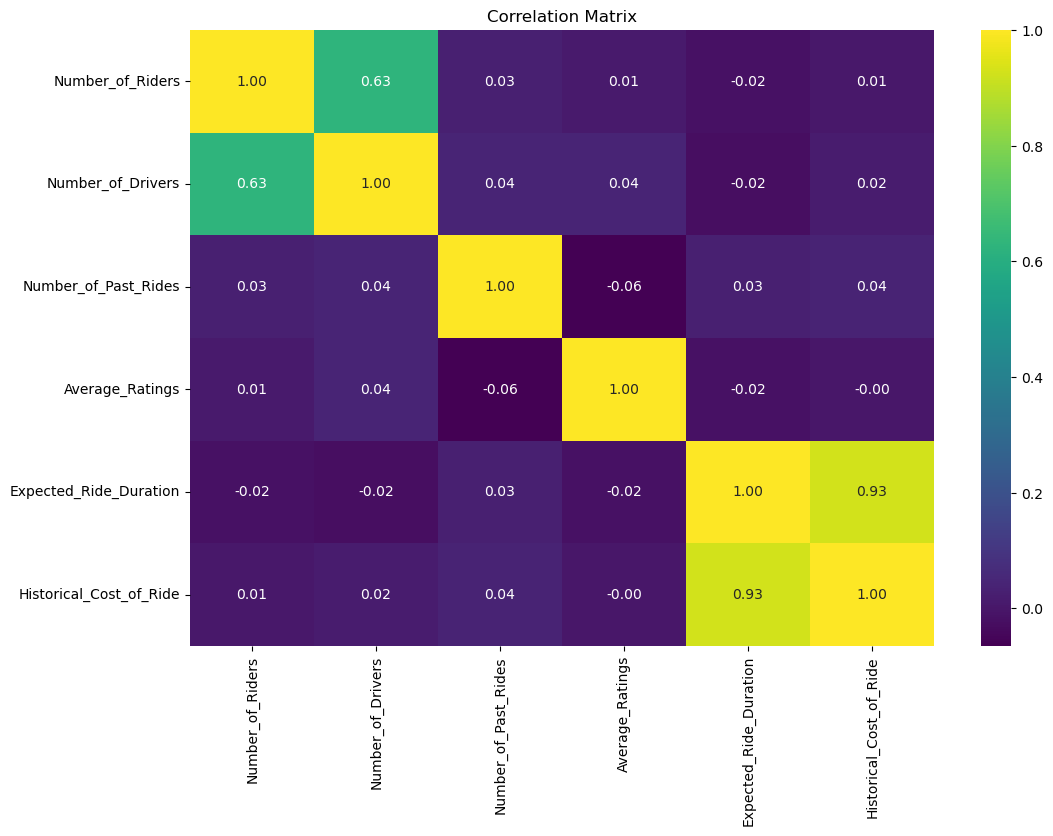

In [11]:
corr_matrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot= True, cmap= 'viridis', fmt = '.2f')

plt.title('Correlation Matrix')

plt.show()

In [12]:
high_demand_percentile = 75
low_demand_percentile = 25

In [13]:
df['demand_multiplier'] = np.where(df['Number_of_Drivers'] > np.percentile(df['Number_of_Drivers'], high_demand_percentile),
                                   np.percentile(df['Number_of_Drivers'],high_demand_percentile) / df['Number_of_Drivers'],
                                   np.percentile(df['Number_of_Drivers'],low_demand_percentile) / df['Number_of_Drivers'])

In [14]:
df['demand_multiplier'].head()

0    0.844444
1    0.974359
2    0.354839
3    0.392857
4    0.500000
Name: demand_multiplier, dtype: float64

In [15]:
high_supply_percentile = 75
low_supply_percentile = 25

In [16]:
df['supply_multiplier'] = np.where(df['Number_of_Drivers'] > np.percentile(df['Number_of_Drivers'],low_supply_percentile),
                                   np.percentile(df['Number_of_Drivers'], high_supply_percentile)/ df['Number_of_Drivers'],
                                   np.percentile(df['Number_of_Drivers'], low_supply_percentile) / df['Number_of_Drivers'])

In [17]:
df['supply_multiplier'].head()

0    0.844444
1    0.974359
2    1.225806
3    1.357143
4    1.727273
Name: supply_multiplier, dtype: float64

In [18]:
demand_threshold_high = 1.2
demand_threshold_low = 0.8
supply_threshold_high = 0.8
supply_threshold_low = 1.2

In [19]:
df['adjusted_ride_cost'] = df['Historical_Cost_of_Ride'] * (np.maximum(df['demand_multiplier'], demand_threshold_low)) * np.maximum(df['supply_multiplier'], supply_threshold_high)

In [20]:
df['adjusted_ride_cost'].head()

0    202.700001
1    165.072415
2    323.412331
3    510.504194
4    801.014329
Name: adjusted_ride_cost, dtype: float64

In [21]:
df['Profit Percentage'] = ((df['adjusted_ride_cost'] - df['Historical_Cost_of_Ride']) / df['Historical_Cost_of_Ride']) * 100

In [23]:
df['Profit Percentage'].head()

0   -28.691358
1    -5.062459
2    -1.935484
3     8.571429
4    38.181818
Name: Profit Percentage, dtype: float64

In [24]:
profitable_rides = df[df['Profit Percentage'] > 0]
loss_rides = df[df['Profit Percentage'] < 0]

In [25]:
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

In [26]:
labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

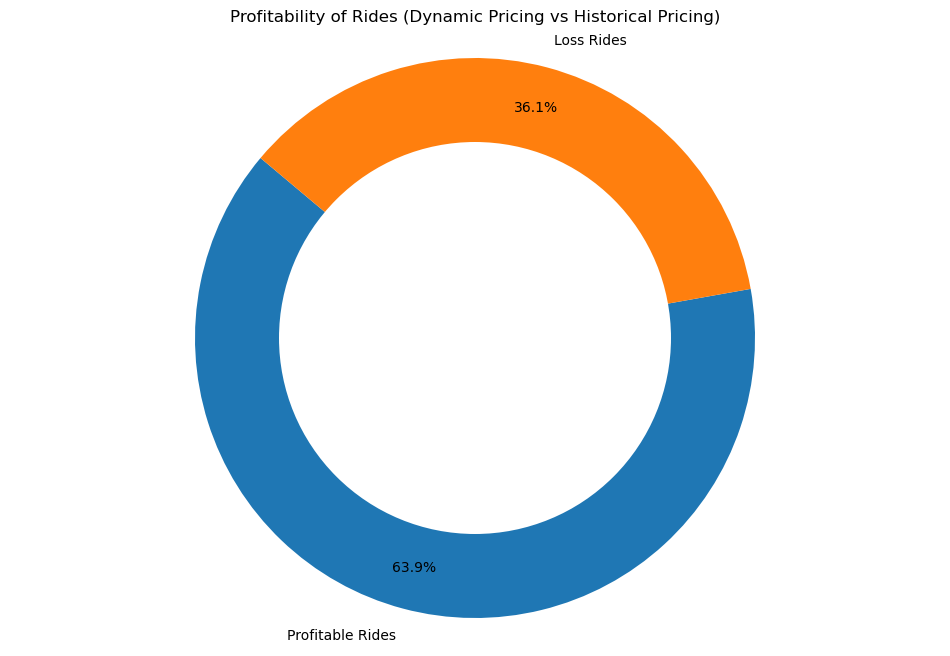

In [27]:
plt.figure(figsize=(12,8))
plt.pie(values, labels=labels, autopct= '%1.1f%%', startangle= 140, pctdistance= 0.85)
plt.title('Profitability of Rides (Dynamic Pricing vs Historical Pricing)')

centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.show()

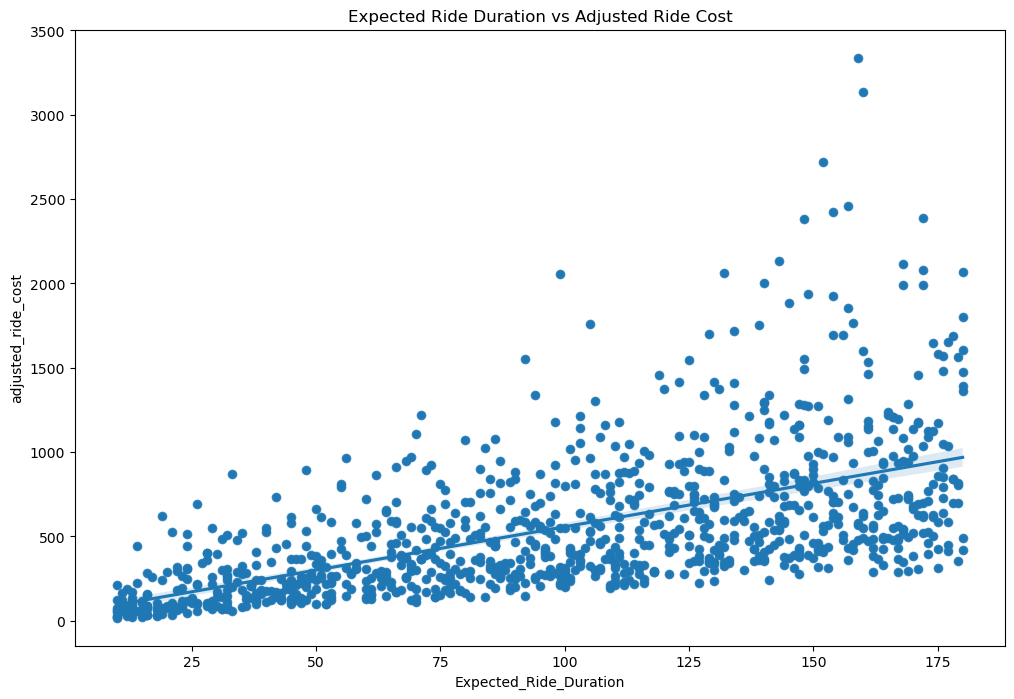

In [28]:
plt.figure(figsize= (12,8))
sns.scatterplot(data = df, x = 'Expected_Ride_Duration',
                y = 'adjusted_ride_cost',
                )

sns.regplot(data = df, x = 'Expected_Ride_Duration',
                y = 'adjusted_ride_cost',)

plt.title('Expected Ride Duration vs Adjusted Ride Cost')

plt.show()